<a href="https://colab.research.google.com/github/theouterlimitz/Solar_Power_Prediction/blob/main/02_Solar_EDA_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is the relationship between the amount of sunlight (Irradiation) and the power generated (AC Power)?**

Loading the curated dataset from 'solar_curated_data.pkl'...
Dataset loaded successfully.

Generating scatter plot of AC Power vs. Irradiation...


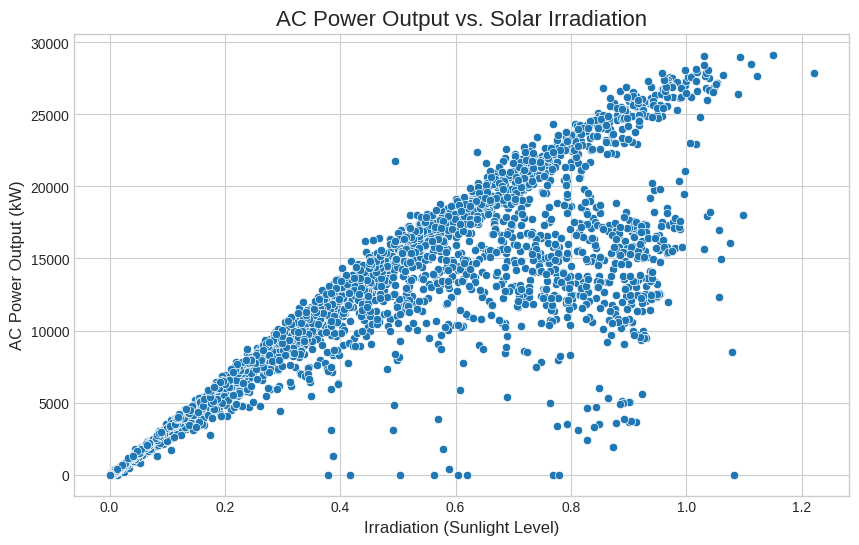

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load Your Curated Dataset ---
# In all future steps for this project, you will start with this line.
print("Loading the curated dataset from 'solar_curated_data.pkl'...")
try:
    df = pd.read_pickle('solar_curated_data.pkl')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("ERROR: 'solar_curated_data.pkl' not found. Please ensure it is uploaded to this Colab session.")
    df = pd.DataFrame() # Create empty df to prevent errors

# --- Step 2: Create Your First EDA Visualization ---
if not df.empty:
    print("\nGenerating scatter plot of AC Power vs. Irradiation...")

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10, 6))

    # A scatter plot is perfect for visualizing the relationship between two numeric variables
    sns.scatterplot(x='IRRADIATION', y='AC_POWER', data=df)

    plt.title('AC Power Output vs. Solar Irradiation', fontsize=16)
    plt.xlabel('Irradiation (Sunlight Level)', fontsize=12)
    plt.ylabel('AC Power Output (kW)', fontsize=12)
    plt.grid(True)
    plt.show()
else:
    print("Could not load data. Skipping plot generation.")

**Exploring Temperature**


Generating plots to analyze the effect of temperature...


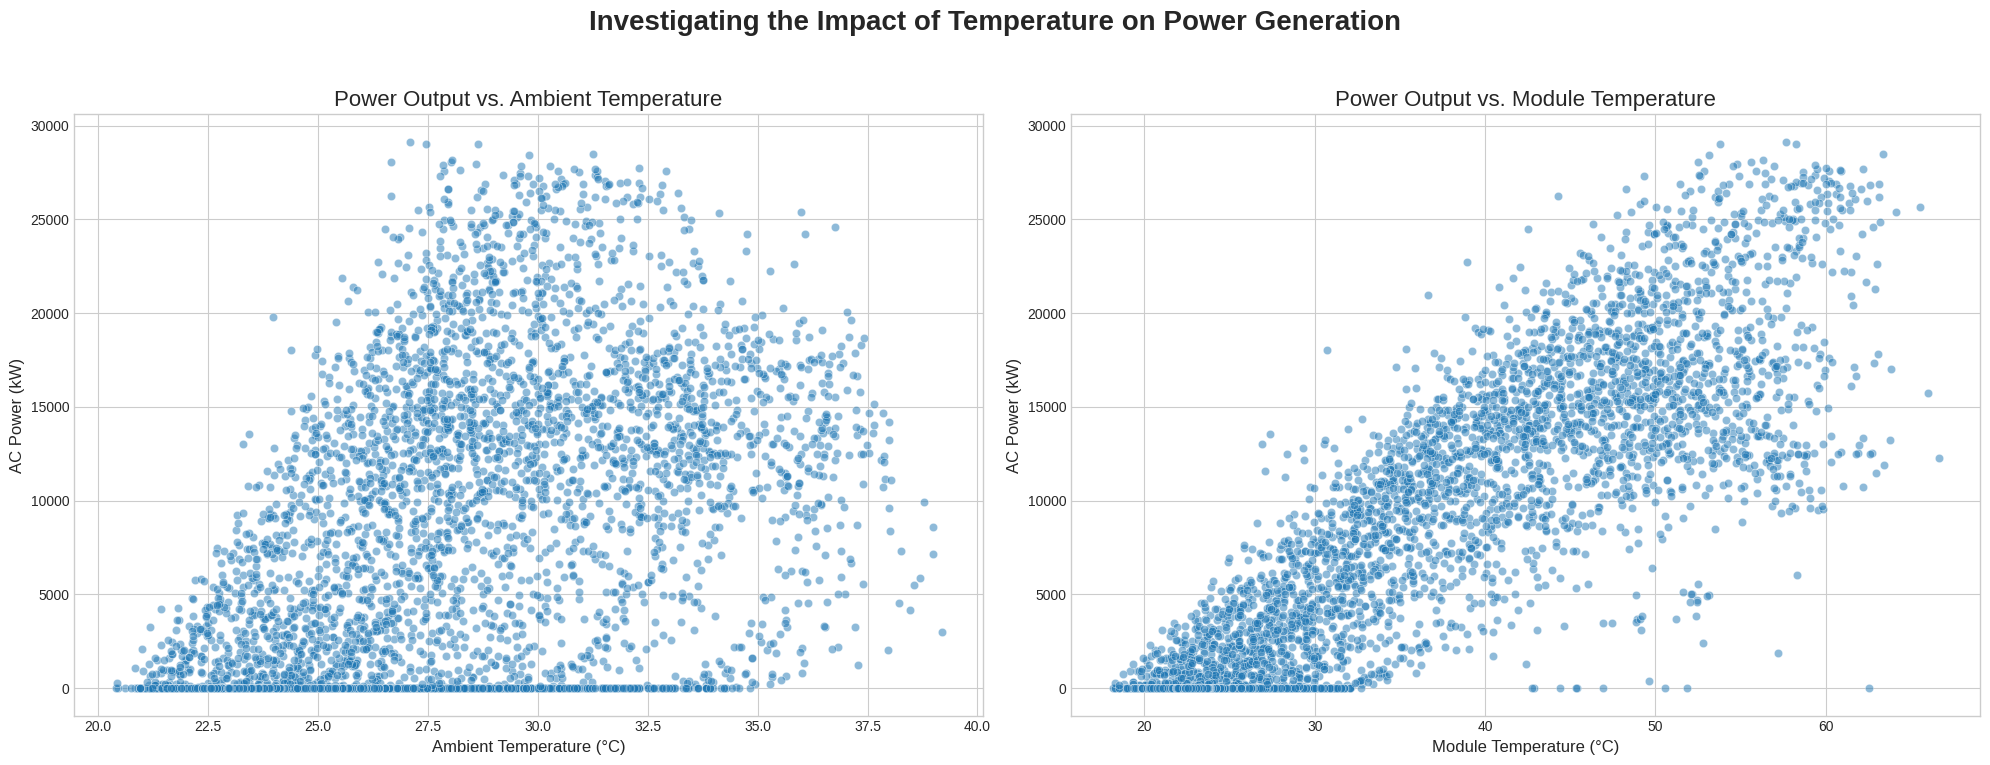

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Assume 'df' is your curated DataFrame from the previous step ---
# If you are in a new session, uncomment the line below
# df = pd.read_pickle('solar_curated_data.pkl')

# ===================================================================
# --- Step 3: Explore the Effect of Temperature ---
# ===================================================================
if not df.empty:
    print("\nGenerating plots to analyze the effect of temperature...")

    plt.style.use('seaborn-v0_8-whitegrid')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8)) # Create two subplots side-by-side

    # Plot 1: AC Power vs. Ambient Temperature
    sns.scatterplot(ax=ax1, data=df, x='AMBIENT_TEMPERATURE', y='AC_POWER', alpha=0.5)
    ax1.set_title('Power Output vs. Ambient Temperature', fontsize=16)
    ax1.set_xlabel('Ambient Temperature (°C)', fontsize=12)
    ax1.set_ylabel('AC Power (kW)', fontsize=12)

    # Plot 2: AC Power vs. Module Temperature
    sns.scatterplot(ax=ax2, data=df, x='MODULE_TEMPERATURE', y='AC_POWER', alpha=0.5)
    ax2.set_title('Power Output vs. Module Temperature', fontsize=16)
    ax2.set_xlabel('Module Temperature (°C)', fontsize=12)
    ax2.set_ylabel('AC Power (kW)', fontsize=12)

    plt.suptitle('Investigating the Impact of Temperature on Power Generation', fontsize=20, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
    plt.show()

else:
    print("Could not load data. Skipping plot generation.")

Analysis of Temperature Plots

1. Power Output vs. Ambient Temperature (Left Plot)

What it shows: This plot shows the relationship between the surrounding air temperature and the power output. You can see the points form a kind of cone or triangle shape.
The Insight: This shows that the highest power generation happens during moderately high ambient temperatures (e.g., 25-35°C). This makes sense because those temperatures often coincide with the middle of the day when solar irradiation is also at its peak. The relationship isn't simple, as both very low and very high temperatures can occur when there is little sun (early morning or night).
2. Power Output vs. Module Temperature (Right Plot - The Key Insight)

What it shows: This plot compares the temperature of the solar panels themselves to the power output. This is a much clearer and more important relationship.

**Visualizing a Full Day's Cycle**


Generating plot for a single day's cycle...


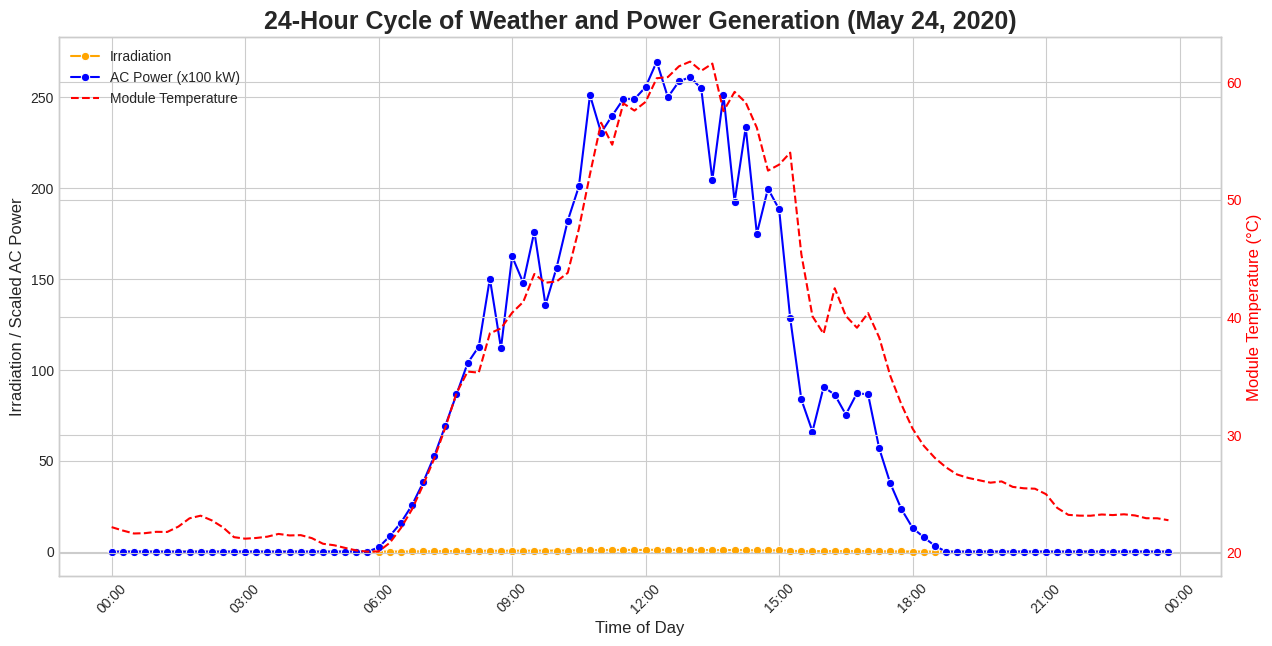

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# --- Assume 'df' is your curated DataFrame from the previous step ---
# If you are in a new session, uncomment the line below
# df = pd.read_pickle('solar_curated_data.pkl')

# ===================================================================
# --- Step 4: Visualize a Full Day Cycle ---
# ===================================================================
if not df.empty:
    print("\nGenerating plot for a single day's cycle...")

    # Let's pick a single, sunny day from Plant 1 to visualize
    # We'll choose May 24, 2020
    single_day_df = df[(df['PLANT_ID'] == 1) & (df['DATE_TIME'].dt.date == pd.to_datetime('2020-05-24').date())]

    # Create the plot with two different y-axes
    fig, ax1 = plt.subplots(figsize=(15, 7))
    plt.style.use('seaborn-v0_8-whitegrid')

    # Plot Irradiation and AC Power on the primary y-axis (ax1)
    sns.lineplot(data=single_day_df, x='DATE_TIME', y='IRRADIATION', ax=ax1, color='orange', label='Irradiation', marker='o')

    # ** THE FIX IS HERE: Use single_day_df instead of df_final **
    sns.lineplot(data=single_day_df, x='DATE_TIME', y=single_day_df['AC_POWER']/100, ax=ax1, color='blue', label='AC Power (x100 kW)', marker='o') # Scaled for visibility

    ax1.set_ylabel('Irradiation / Scaled AC Power', fontsize=12)
    ax1.set_xlabel('Time of Day', fontsize=12)
    ax1.tick_params(axis='x', rotation=45)

    # Create a secondary y-axis for Temperature (ax2)
    ax2 = ax1.twinx()
    sns.lineplot(data=single_day_df, x='DATE_TIME', y='MODULE_TEMPERATURE', ax=ax2, color='red', label='Module Temperature', linestyle='--')
    ax2.set_ylabel('Module Temperature (°C)', fontsize=12, color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Create a single legend for all lines
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
    ax1.get_legend().remove()

    plt.title('24-Hour Cycle of Weather and Power Generation (May 24, 2020)', fontsize=18, fontweight='bold')

    # Format x-axis to show only the time
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    plt.show()
else:
    print("Could not load data. Skipping plot generation.")